In [3]:
from stardist.models import StarDist2D
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [4]:
model= StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.


2022-04-05 14:56:58.927052: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-05 14:56:58.927217: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-05 14:56:58.927564: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 9. Tune using inter_op_parallelism_threads for best performance.


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [5]:
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from tifffile import imread

In [6]:
img= imread('/home/isabella.osei/Projects/Imgs/1.tif')

In [7]:
labels,details = model.predict_instances(normalize(img))

2022-04-05 14:57:08.962415: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-05 14:57:08.975749: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


In [8]:
axis_norm= (0,1)

In [9]:
img= normalize(img, 1,99.8,axis= axis_norm)

Text(0.5, 1.0, 'prediction + input overlay')

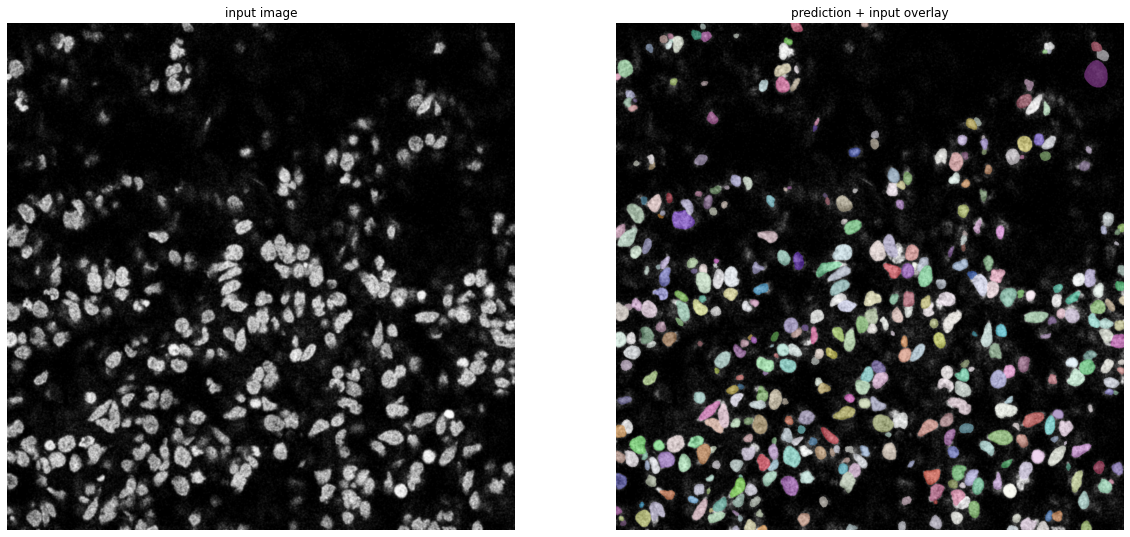

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img= img))
plt.axis("off")
plt.title("prediction + input overlay")

Text(0.5, 1.0, 'input image')

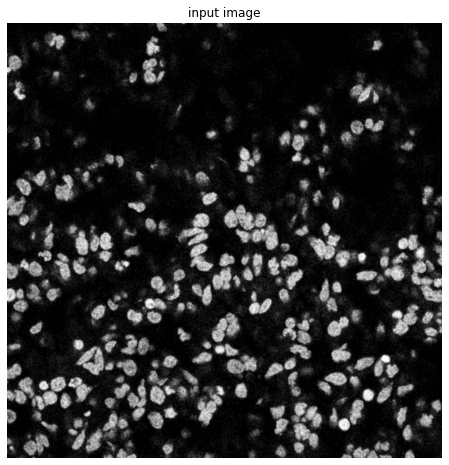

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("input image")


Text(0.5, 1.0, 'prediction + input overlay')

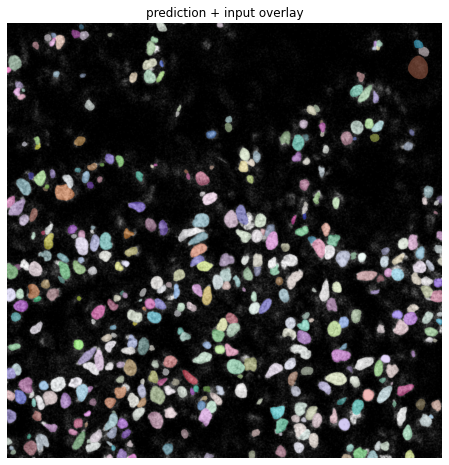

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(render_label(labels, img= img))
plt.axis("off")
plt.title("prediction + input overlay")

In [12]:
from stardist import random_label_cmap, draw_polygons

In [13]:
import numpy as np

In [14]:
lbl = render_label(labels, img= img)

In [15]:
centers=details["points"]

In [16]:
print(len(details["coord"]))

430


In [17]:
print(centers)

[[ 882  102]
 [ 808  536]
 [ 838  780]
 [ 608  496]
 [ 876  850]
 [ 802  574]
 [ 736  496]
 [ 516  622]
 [ 466  596]
 [ 462  526]
 [ 696  950]
 [ 866  550]
 [1000   56]
 [ 578   66]
 [ 944  794]
 [ 804  666]
 [ 870  266]
 [ 622  776]
 [ 572  464]
 [ 726  998]
 [ 966  942]
 [ 888  138]
 [ 592  566]
 [ 670  582]
 [ 464  458]
 [ 916  636]
 [ 812  874]
 [ 980  722]
 [ 718  770]
 [ 998  686]
 [ 768  500]
 [ 520  932]
 [ 592  406]
 [ 932  730]
 [ 682  214]
 [ 892  242]
 [ 854   86]
 [1002  378]
 [ 866  176]
 [ 414  474]
 [ 548  230]
 [ 718  928]
 [ 432  312]
 [ 522  176]
 [ 850  118]
 [ 934  352]
 [ 560  888]
 [ 326  704]
 [ 540  758]
 [ 942  272]
 [ 556  590]
 [ 874  888]
 [ 502  588]
 [ 712  700]
 [ 610  352]
 [ 758  168]
 [ 646  470]
 [ 528  736]
 [ 284  684]
 [ 666   32]
 [ 788  462]
 [ 706  666]
 [ 310  560]
 [ 900  826]
 [ 244  822]
 [ 880   32]
 [ 256  952]
 [ 464   38]
 [ 790  890]
 [ 796  384]
 [ 914  716]
 [ 238  698]
 [ 782  780]
 [ 380  700]
 [ 702  792]
 [ 640  650]
 [ 936  986]

In [18]:
from skimage.measure import regionprops

centers = tuple(r.centroid for r in regionprops(labels)) 

In [19]:
len(centers)

430

In [ ]:
plt.subplot(121);plt.imshow(labels)
plt.subplot(122); plt.imshow(lbl)

In [20]:
img1= imread('/home/isabella.osei/Projects/9.tif')

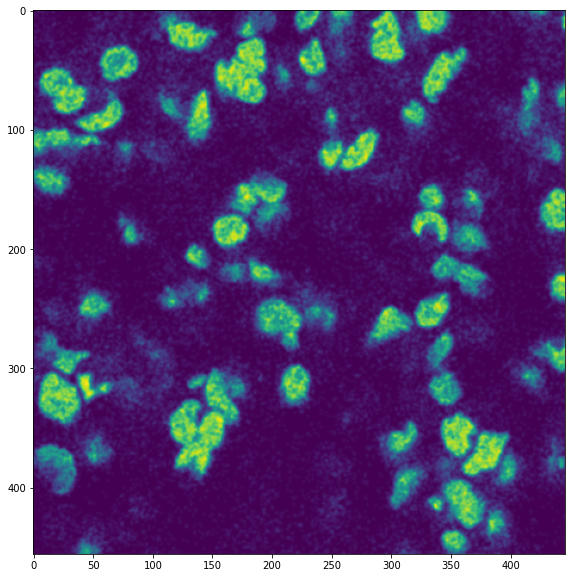

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(img1)

In [24]:
img1= normalize(img1, 1,99.8,axis= axis_norm)

In [26]:
labels1,details1 = model.predict_instances(normalize(img1))

Text(0.5, 1.0, 'prediction + input overlay')

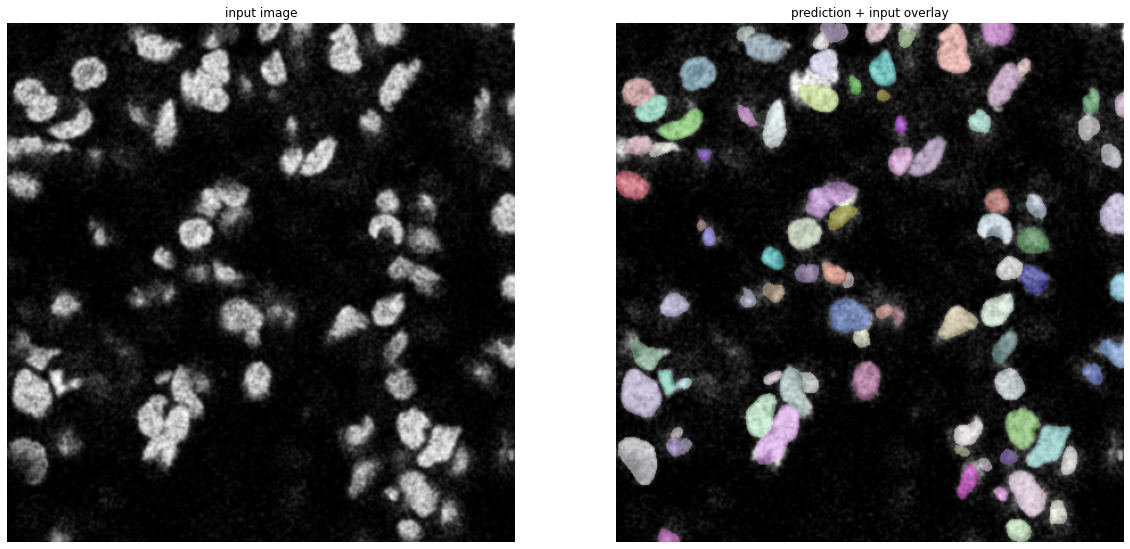

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(img1,cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels1, img= img1))
plt.axis("off")
plt.title("prediction + input overlay")

In [28]:
print(len(details1["coord"]))

90
